In [41]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf    
from scipy.optimize import minimize   

In [42]:
tickers = ['VTI', 'AGG', 'DBC', '^VIX']
data = yf.download(tickers, start="2006-01-01", end="2020-12-31", interval="1d")['Adj Close']
data_rets = data.pct_change()
data_rets.dropna(inplace = True)
data_rets.index = data_rets.index.strftime("%m-%d-%Y")
data_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AGG,DBC,VTI,^VIX
Date,,,,
02-07-2006,-0.000699,-0.028926,-0.009737,0.042178
02-08-2006,-0.000498,-0.004255,0.007195,-0.055923
02-09-2006,0.000600,0.009402,-0.001905,0.022603
02-10-2006,-0.002098,-0.018205,0.002067,-0.019055
02-13-2006,0.000701,-0.015524,-0.004523,0.037296


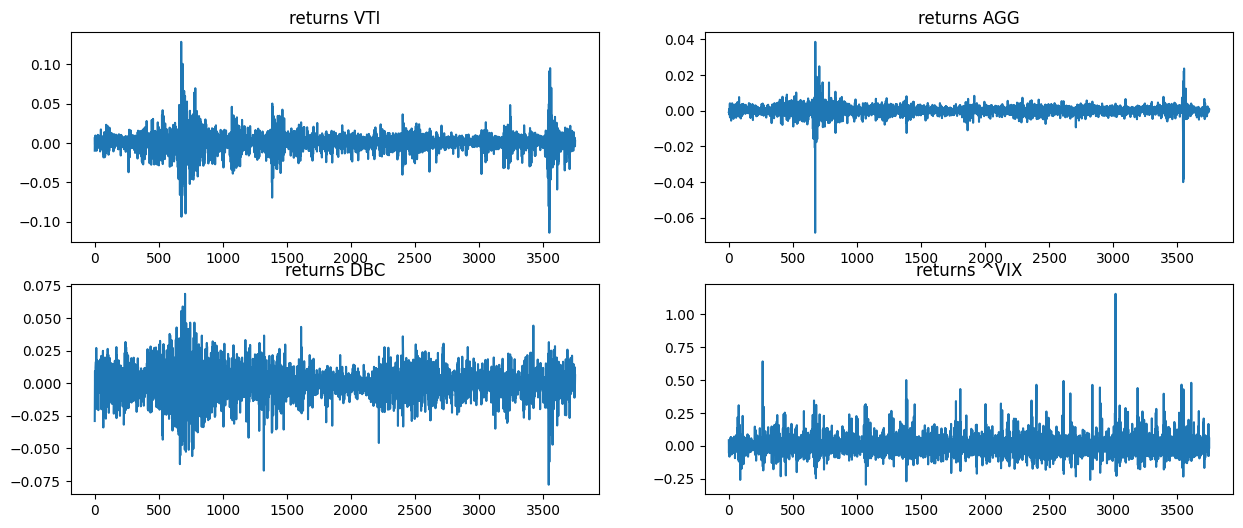

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

axes = axes.flatten()

for i, ticker in enumerate(tickers):
    axes[i].plot(data_rets[ticker].values)
    axes[i].set_title(f"returns {ticker}")
plt.show()

In [53]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    """
    computes the mean and the vol of the portfolio returns 
    """
    portfolio_rets = np.dot(weights, mean_returns)
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_rets, portfolio_vol

def portfolio_variance(weights, mean_returns, cov_matrix):
    """
    defines the objective function for the optimization problem
    """
    return portfolio_performance(weights, mean_returns, cov_matrix)[1] ** 2

In [59]:
# Optimizing the portfolio 

mean_returns = data_rets.mean() * 252
cov_matrix = data_rets.cov() * 252

num_assets = len(mean_returns)

initial_guess = num_assets * [1 / num_assets]
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))

optimized_result = minimize(portfolio_variance,
                            initial_guess,
                            args=(mean_returns, cov_matrix),
                            method='SLSQP',
                            bounds=bounds,
                            constraints=constraints)

In [64]:
optimal_weights = optimized_result.x

# Portfolio performance with optimal weights
optimal_return, optimal_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)

print("Optimal Weights:", optimal_weights)
print("Expected Annual Return:", optimal_return)
print("Annual Volatility:", optimal_volatility)


Optimal Weights: [0.8492323  0.03694553 0.10257127 0.0112509 ]
Expected Annual Return: 0.05796727755294734
Annual Volatility: 0.04628081980870764
